# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [116]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=";")

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv",sep=";")

In [117]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).


In [118]:
print(f"Azidas Shape: {azdias.shape}")
azdias.head(5)

Azidas Shape: (891221, 85)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [119]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [120]:
print(f"feat_info Shape: {feat_info.shape}")
feat_info.head(15)

feat_info Shape: (85, 4)


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [121]:
# Identify missing or unknown data values and convert them to NaNs.-
#getting numebr of azdias features

In [122]:
#getting numebr of azdias features
azdias_n_features = azdias.shape[1]

#getting a dictionary with the NaNs of every feature
#   Key: feature name
#   value: string with the missing_or_unknown values combination
feature_NaNs = {}
for feature_index in range(0, azdias_n_features):
    feature_name = feat_info.loc[feature_index, 'attribute']
    feature_NaNs[feature_name] = feat_info.loc[feature_index, 'missing_or_unknown']
    
#Refactoring of the feature_NaNs dictionary.
#   Key: Feature name
#   Value: list of trings. Eache of these strings is a missing_or_unknown value
for key in feature_NaNs: 
    feature_NaNs[key] = feature_NaNs[key].strip('][').split(',')
    feature_NaNs[key] = [int(missing) if (missing!='X' and missing!='XX' and missing!='') 
                                         else missing for missing in feature_NaNs[key]]
    
print(feature_NaNs)

{'AGER_TYP': [-1, 0], 'ALTERSKATEGORIE_GROB': [-1, 0, 9], 'ANREDE_KZ': [-1, 0], 'CJT_GESAMTTYP': [0], 'FINANZ_MINIMALIST': [-1], 'FINANZ_SPARER': [-1], 'FINANZ_VORSORGER': [-1], 'FINANZ_ANLEGER': [-1], 'FINANZ_UNAUFFAELLIGER': [-1], 'FINANZ_HAUSBAUER': [-1], 'FINANZTYP': [-1], 'GEBURTSJAHR': [0], 'GFK_URLAUBERTYP': [''], 'GREEN_AVANTGARDE': [''], 'HEALTH_TYP': [-1, 0], 'LP_LEBENSPHASE_FEIN': [0], 'LP_LEBENSPHASE_GROB': [0], 'LP_FAMILIE_FEIN': [0], 'LP_FAMILIE_GROB': [0], 'LP_STATUS_FEIN': [0], 'LP_STATUS_GROB': [0], 'NATIONALITAET_KZ': [-1, 0], 'PRAEGENDE_JUGENDJAHRE': [-1, 0], 'RETOURTYP_BK_S': [0], 'SEMIO_SOZ': [-1, 9], 'SEMIO_FAM': [-1, 9], 'SEMIO_REL': [-1, 9], 'SEMIO_MAT': [-1, 9], 'SEMIO_VERT': [-1, 9], 'SEMIO_LUST': [-1, 9], 'SEMIO_ERL': [-1, 9], 'SEMIO_KULT': [-1, 9], 'SEMIO_RAT': [-1, 9], 'SEMIO_KRIT': [-1, 9], 'SEMIO_DOM': [-1, 9], 'SEMIO_KAEM': [-1, 9], 'SEMIO_PFLICHT': [-1, 9], 'SEMIO_TRADV': [-1, 9], 'SHOPPER_TYP': [-1], 'SOHO_KZ': [-1], 'TITEL_KZ': [-1, 0], 'VERS_TYP': [-

In [123]:
  for key in feature_NaNs:
    print(f"Setting NaNs for feature {key}")
    azdias[key].replace(to_replace=feature_NaNs[key], value=np.nan, inplace=True)

Setting NaNs for feature AGER_TYP
Setting NaNs for feature ALTERSKATEGORIE_GROB
Setting NaNs for feature ANREDE_KZ
Setting NaNs for feature CJT_GESAMTTYP
Setting NaNs for feature FINANZ_MINIMALIST
Setting NaNs for feature FINANZ_SPARER
Setting NaNs for feature FINANZ_VORSORGER
Setting NaNs for feature FINANZ_ANLEGER
Setting NaNs for feature FINANZ_UNAUFFAELLIGER
Setting NaNs for feature FINANZ_HAUSBAUER
Setting NaNs for feature FINANZTYP
Setting NaNs for feature GEBURTSJAHR
Setting NaNs for feature GFK_URLAUBERTYP
Setting NaNs for feature GREEN_AVANTGARDE
Setting NaNs for feature HEALTH_TYP
Setting NaNs for feature LP_LEBENSPHASE_FEIN
Setting NaNs for feature LP_LEBENSPHASE_GROB
Setting NaNs for feature LP_FAMILIE_FEIN
Setting NaNs for feature LP_FAMILIE_GROB
Setting NaNs for feature LP_STATUS_FEIN
Setting NaNs for feature LP_STATUS_GROB
Setting NaNs for feature NATIONALITAET_KZ
Setting NaNs for feature PRAEGENDE_JUGENDJAHRE
Setting NaNs for feature RETOURTYP_BK_S
Setting NaNs for feat

In [124]:
azdias.head(15)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,NaN,2.0,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,NaN,1.0,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,NaN,3.0,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,NaN,3.0,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [125]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

In [126]:
missing_values_percentage = {}
for feature_name in missing_values_counter:
    missing_values_percentage[feature_name] =  azdias[feature_name].isnull().sum()/azdias.shape[0]*100
    
print("missing_values_percentage")
print(missing_values_percentage)

missing_values_percentage
{'AGER_TYP': 76.955435296071343, 'ALTERSKATEGORIE_GROB': 0.32326437550282144, 'ANREDE_KZ': 0.0, 'CJT_GESAMTTYP': 0.54464605299919999, 'FINANZ_MINIMALIST': 0.0, 'FINANZ_SPARER': 0.0, 'FINANZ_VORSORGER': 0.0, 'FINANZ_ANLEGER': 0.0, 'FINANZ_UNAUFFAELLIGER': 0.0, 'FINANZ_HAUSBAUER': 0.0, 'FINANZTYP': 0.0, 'GEBURTSJAHR': 44.02028228688507, 'GFK_URLAUBERTYP': 0.54464605299919999, 'GREEN_AVANTGARDE': 0.0, 'HEALTH_TYP': 12.476815514894735, 'LP_LEBENSPHASE_FEIN': 10.954858559212585, 'LP_LEBENSPHASE_GROB': 10.611509378706293, 'LP_FAMILIE_FEIN': 8.7286991666489016, 'LP_FAMILIE_GROB': 8.7286991666489016, 'LP_STATUS_FEIN': 0.54464605299919999, 'LP_STATUS_GROB': 0.54464605299919999, 'NATIONALITAET_KZ': 12.153551139391913, 'PRAEGENDE_JUGENDJAHRE': 12.136608091595686, 'RETOURTYP_BK_S': 0.54464605299919999, 'SEMIO_SOZ': 0.0, 'SEMIO_FAM': 0.0, 'SEMIO_REL': 0.0, 'SEMIO_MAT': 0.0, 'SEMIO_VERT': 0.0, 'SEMIO_LUST': 0.0, 'SEMIO_ERL': 0.0, 'SEMIO_KULT': 0.0, 'SEMIO_RAT': 0.0, 'SEMIO_

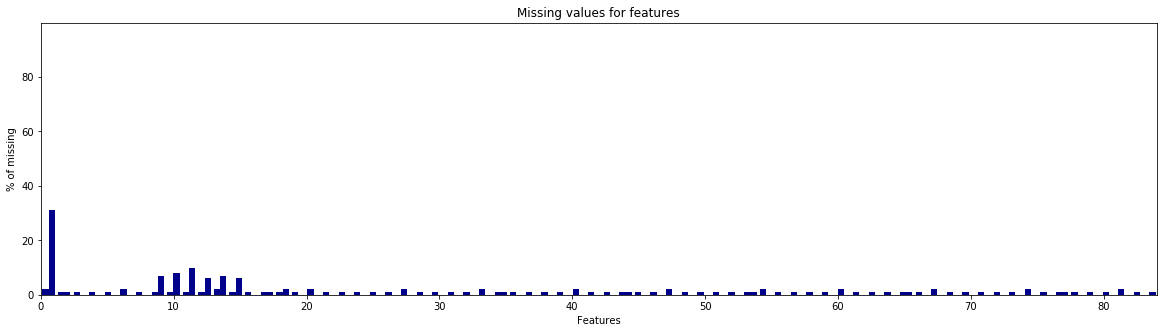

In [127]:
# Investigate patterns in the amount of missing data in each column.
# the histogram of the data
n_features = len(missing_values_percentage.keys())
x_axis = list(range(0, n_features))
y_axis = list(missing_values_percentage.values())

plt.figure(figsize = (20,5))
diagram_data = [x_axis, y_axis]

plt.hist(diagram_data, bins=n_features, facecolor='darkblue', density=False)
plt.xlabel('Features')
plt.ylabel('% of missing')
plt.title('Missing values for features')
plt.axis([0, max(x_axis), 0, max(y_axis)])

plt.show()


In [128]:
sorted_missing_values = {key: value for key, value in sorted(missing_values_percentage.items(), key=lambda item: item[1], reverse=True)}
print(sorted_missing_values)

{'TITEL_KZ': 99.757635872583791, 'AGER_TYP': 76.955435296071343, 'KK_KUNDENTYP': 65.596748730112949, 'KBA05_BAUMAX': 53.468668265222654, 'GEBURTSJAHR': 44.02028228688507, 'ALTER_HH': 34.813699407890972, 'KKK': 17.73566825736826, 'REGIOTYP': 17.73566825736826, 'W_KEIT_KIND_HH': 16.605084485217471, 'KBA05_ANTG1': 14.959701353536328, 'KBA05_ANTG2': 14.959701353536328, 'KBA05_ANTG3': 14.959701353536328, 'KBA05_ANTG4': 14.959701353536328, 'KBA05_GBZ': 14.959701353536328, 'MOBI_REGIO': 14.959701353536328, 'PLZ8_ANTG1': 13.073637178657146, 'PLZ8_ANTG2': 13.073637178657146, 'PLZ8_ANTG3': 13.073637178657146, 'PLZ8_ANTG4': 13.073637178657146, 'PLZ8_BAUMAX': 13.073637178657146, 'PLZ8_HHZ': 13.073637178657146, 'PLZ8_GBZ': 13.073637178657146, 'HEALTH_TYP': 12.476815514894735, 'SHOPPER_TYP': 12.476815514894735, 'VERS_TYP': 12.476815514894735, 'NATIONALITAET_KZ': 12.153551139391913, 'PRAEGENDE_JUGENDJAHRE': 12.136608091595686, 'KBA13_ANZAHL_PKW': 11.871354018812394, 'ANZ_HAUSHALTE_AKTIV': 11.17691347

In [129]:
features_outliers_high = { key: value for (key,value) in missing_values_percentage.items() if value > 20}
print(f"There are {len(features_outliers_high)} outliers with high level of data missing")
print("")
print(f"Features with high level of data missing: {features_outliers_high}")
print("")
print("-----------------------------------------------")
features_outliers_medium = { key: value for (key,value) in missing_values_percentage.items() if value > 8 and value <= 20}
print(f"There are {len(features_outliers_medium)} outliers with medium level of data missing")
print("")
print(f"Features with medium level of data missing: {features_outliers_medium}")
print("")
print("-----------------------------------------------")
features_outliers_low = { key: value for (key,value) in missing_values_percentage.items() if  value <= 8}
print(f"There are {len(features_outliers_low)} outliers with low level of data missing")
print("")
print(f"Features with low level of data missing: {features_outliers_low}")
print("")
print("-----------------------------------------------")
features_no_missing_data = {key: value for (key,value) in missing_values_percentage.items() if  value == 0}
print(f"There are {len(features_no_missing_data)} features without data missing")
print("")
print(f"Features without data missing: {features_no_missing_data}")

There are 6 outliers with high level of data missing

Features with high level of data missing: {'AGER_TYP': 76.955435296071343, 'GEBURTSJAHR': 44.02028228688507, 'TITEL_KZ': 99.757635872583791, 'ALTER_HH': 34.813699407890972, 'KK_KUNDENTYP': 65.596748730112949, 'KBA05_BAUMAX': 53.468668265222654}

-----------------------------------------------
There are 47 outliers with medium level of data missing

Features with medium level of data missing: {'HEALTH_TYP': 12.476815514894735, 'LP_LEBENSPHASE_FEIN': 10.954858559212585, 'LP_LEBENSPHASE_GROB': 10.611509378706293, 'LP_FAMILIE_FEIN': 8.7286991666489016, 'LP_FAMILIE_GROB': 8.7286991666489016, 'NATIONALITAET_KZ': 12.153551139391913, 'PRAEGENDE_JUGENDJAHRE': 12.136608091595686, 'SHOPPER_TYP': 12.476815514894735, 'SOHO_KZ': 8.2470004634091882, 'VERS_TYP': 12.476815514894735, 'ANZ_PERSONEN': 8.2470004634091882, 'ANZ_TITEL': 8.2470004634091882, 'W_KEIT_KIND_HH': 16.605084485217471, 'WOHNDAUER_2008': 8.2470004634091882, 'ANZ_HAUSHALTE_AKTIV': 1

In [130]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias= azdias.drop(columns=features_outliers_high.keys())
azdias.head(15)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,2.0,2,5.0,1,5,1,5,4,3,4,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,1.0,1,3.0,3,3,4,1,3,2,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,3.0,1,3.0,4,4,2,4,2,2,6,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,3.0,2,4.0,2,4,2,3,5,4,1,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

This dataset has three ranges of data missing features.
1) There are a few features with a really high percentage of rows without data (over 50%). This means that our data has no a value for the most of the tuples. These features are really low informative. I think this is not enaugh for considering the feature as impactive in ur study.
2) There is a set of features (about 50%) in a medium-low level of data missing. These features has no data in their rows for about the 10% of them. There are many features in this condition, but the percentage is quite low. Thus, I think these ones should not be dropped.
3) There are some features with a low level of data missing (less than one third of the features). These features has a data missing of less than 1%. Many of the features in this range has no data missing. These features may be very informative, if they're no droppable or mixable with some technique of feature extraction/selection.

For these reasons, i decided to drop the features 'AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [131]:
# How much data is missing in each row of the dataset?

In [133]:
#getting a list with the value of how many NaNs for each row (the index of the list is the index of the row in the df)
rows_missing_values_counter = list(azdias.isnull().sum(axis=1))

In [134]:
unique_values = set(rows_missing_values_counter)
print(unique_values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49}


In [135]:
val_counter = {}
for val in unique_values:
    val_counter[val] = rows_missing_values_counter.count(val)
    
print(val_counter)

{0: 623209, 1: 15738, 2: 27926, 3: 17629, 4: 12607, 5: 22515, 6: 13771, 7: 13714, 8: 24592, 9: 3042, 10: 5410, 11: 1127, 12: 766, 13: 3255, 14: 2243, 15: 4743, 16: 2505, 17: 677, 18: 428, 19: 1180, 20: 349, 21: 150, 22: 129, 23: 132, 24: 69, 25: 55, 26: 59, 27: 24, 28: 5, 29: 12, 30: 6, 31: 3, 32: 206, 33: 2985, 34: 10816, 35: 3911, 36: 84, 37: 538, 38: 421, 39: 77, 40: 137, 41: 356, 42: 21, 43: 27369, 44: 155, 45: 494, 47: 45578, 48: 1, 49: 2}


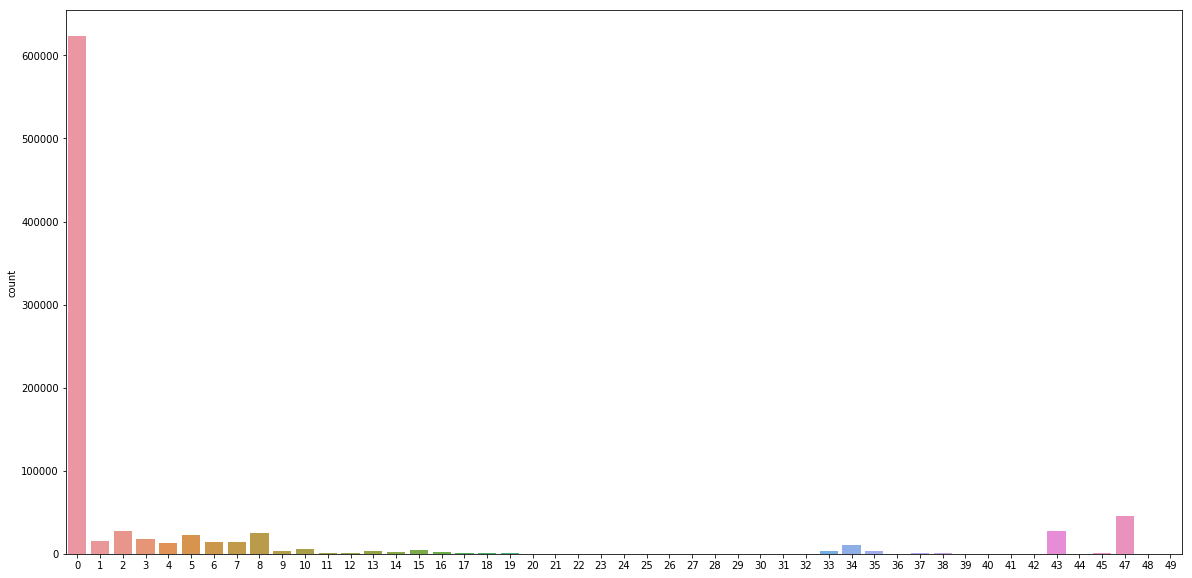

In [136]:
import seaborn as sns

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(rows_missing_values_counter, ax=ax)

In [137]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
missing_threshold = 18

azdias_highmiss = azdias[azdias.isnull().sum(axis=1) > missing_threshold]
azdias_lowmiss = azdias[azdias.isnull().sum(axis=1) <= missing_threshold]

print(f"df with {azdias.shape[0]} rows splitted into {azdias_highmiss.shape[0]}, {azdias_lowmiss.shape[0]}")

df with 891221 rows splitted into 95324, 795897


In [138]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def compare_distribution(feature_name, X_highmiss, X_lowmiss):
    fig_dims = (20, 5)
    fig, ax = plt.subplots(1, 2, figsize=fig_dims)
    ax[0].set_title('Distribution of subset lowmiss')
    ax[1].set_title('Distribution of subset highmiss')
    sns.countplot(X_lowmiss, ax=ax[0])
    sns.countplot(X_highmiss, ax=ax[1])
    

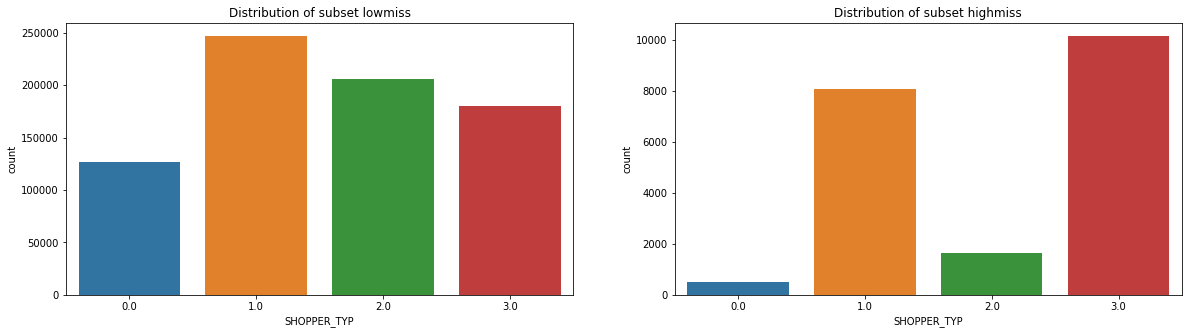

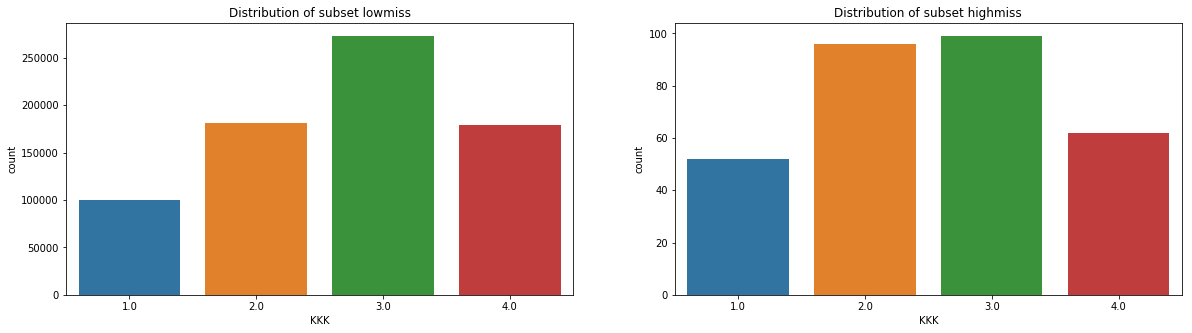

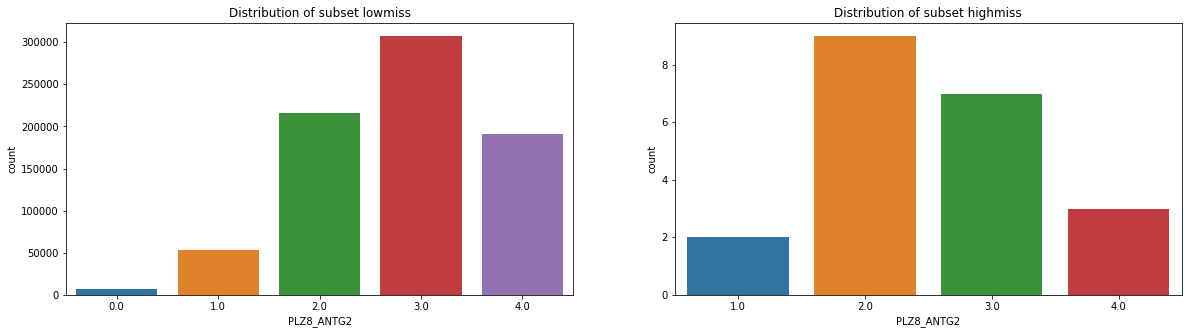

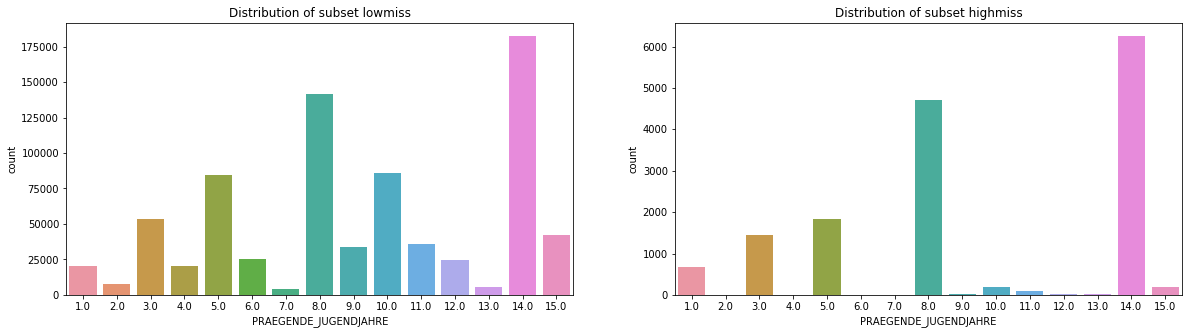

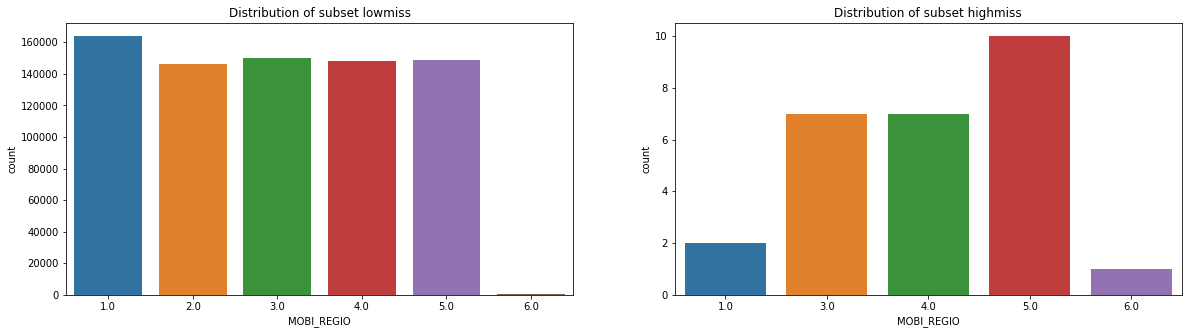

In [139]:
compare_distribution("SHOPPER_TYP", azdias_highmiss["SHOPPER_TYP"], azdias_lowmiss["SHOPPER_TYP"])
compare_distribution("KKK", azdias_highmiss["KKK"], azdias_lowmiss["KKK"])
compare_distribution("PLZ8_ANTG2", azdias_highmiss["PLZ8_ANTG2"], azdias_lowmiss["PLZ8_ANTG2"])
compare_distribution("PRAEGENDE_JUGENDJAHRE", azdias_highmiss["PRAEGENDE_JUGENDJAHRE"], azdias_lowmiss["PRAEGENDE_JUGENDJAHRE"])
compare_distribution("MOBI_REGIO", azdias_highmiss["MOBI_REGIO"], azdias_lowmiss["MOBI_REGIO"])  

#### Discussion 1.1.3: Assess Missing Data in Each Row

This dataset has some rows with data missing. The most part of the records has no data lack. This is good, because we get a lot of information from these records. The tuples has a maximum value of missing features of 49/83: over the 50% of them!
In general: the more is the number of missing values, the less is the number of records owning this lack. This is not totally true because of an exception: there are many tuples (73499, about 10%) with 46 missing values. However, The most of the data has a number of missing features quite low. From 0 to 18 of lack, a reasonable level, we have the most part of the data. Records with more than 18 missing values are a little part and there are few tuples for each value (apart from the exception). For these reasons, I splitted the dataframe in two different dataset using 18 as a threshold. After that, the evaluation of features distributions has given further details. I used five columns with more than 10% of missimg rows: the higher values. The distributions of the two subsets are different. In some feature we can see similarities: there's a similar trend. In other features, such as PLZ8_ANTG2 or SHOPPER_TYP, we can see that the distribution is completely different. In the PLZ8_ANTG2 we can see how the values 2.0 and 3.0 are inverted: with lowmiss 3.0 is more relevant than 2.0, with highmiss vice versa. In SHOPPER_TYPE we can see how the values 0.0 and 2.0 are drastically decreased in the highmiss dataset.


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [140]:
# How many features are there of each data type?
print(feat_info.groupby("type").count())

             attribute  information_level  missing_or_unknown
type                                                         
categorical         21                 21                  21
interval             1                  1                   1
mixed                7                  7                   7
numeric              7                  7                   7
ordinal             49                 49                  49


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [144]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical_features = feat_info[feat_info['type'] == 'categorical']['attribute']

In [148]:
categorical_features = feat_info[feat_info['type'] == 'categorical']['attribute']
categorical_features = [x for x in categorical_features if x in azdias_lowmiss.columns] #avoid dropped features 

binaries = []
multi_level = []
to_encode = []
binaries_to_encode = []

for feature in categorical_features:
    values = azdias_lowmiss[feature].unique()
    values = [x for x in values if not pd.isnull(x)]
    if len(values) == 2:
        if all(str(x).isnumeric() for x in values):
            binaries.append(feature)
        else:
            binaries_to_encode.append(feature)
    else:
        if all(str(x).isnumeric() for x in values):
            multi_level.append(feature)
        else:
            to_encode.append(feature)
        
print(f"binaries features: {binaries}")
print("")
print(f"multi_level features: {multi_level}")
print("")
print(f"to_encode features: {to_encode}")
print("")
print(f"binaries_to_encode features: {binaries_to_encode}")

binaries features: ['ANREDE_KZ', 'GREEN_AVANTGARDE']

multi_level features: ['FINANZTYP', 'ZABEOTYP', 'CAMEO_DEUG_2015']

to_encode features: ['CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'GEBAEUDETYP', 'CAMEO_DEU_2015']

binaries_to_encode features: ['SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']


In [150]:
for binary in binaries_to_encode:
        values = azdias[binary].unique()
        azdias[binary] = azdias[binary].map(lambda x: 0 if x == values[0] else 1)

In [151]:
# Re-encode categorical variable(s) to be kept in the analysis.
print(azdias_lowmiss.shape)

(795897, 79)


In [152]:
dummy_df = pd.get_dummies(azdias_lowmiss, columns=to_encode)
print(azdias_lowmiss.shape)
print(dummy_df.shape)

(795897, 79)
(795897, 176)


In [153]:
azdias_lowmiss.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [154]:
dummy_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GREEN_AVANTGARDE,...,CAMEO_DEU_2015_7E,CAMEO_DEU_2015_8A,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E
1,1.0,2,1,5,2,5,4,5,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,2,1,4,1,2,3,5,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2,4,2,5,2,1,2,6,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1,4,3,4,1,3,2,5,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,2,3,1,5,2,2,5,2,0,...,0,0,0,1,0,0,0,0,0,0


#### Discussion 1.2.1: Re-Encode Categorical Features

I found some categorical features in the dataset: 2 binaries features, 2 multi-level-features and 15 features to encode. I didn't want to drop any column, thus I just encoded the ones that required it. The binaries and the multi-level features hasn't been changed. In order to encode the 15 selected features, I used the pandas get_dummies method and I got a new dataframe with higher dimensions. That's because the one-hot-encoding has been done with a multi-variable representation of the original one.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [155]:
mixed_features = feat_info[feat_info['type'] == 'mixed']['attribute']
mixed_features = [x for x in mixed_features if x in dummy_df.columns] #avoid dropped features 

print(mixed_features)

['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'WOHNLAGE', 'CAMEO_INTL_2015', 'PLZ8_BAUMAX']


In [156]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
import math

PJ_data_dictionary = {
                          1: "40s - war years (Mainstream, E+W)",
                          2: "40s - reconstruction years (Avantgarde, E+W)",
                          3: "50s - economic miracle (Mainstream, E+W)",
                          4: "50s - milk bar / Individualisation (Avantgarde, E+W)",
                          5: "60s - economic miracle (Mainstream, E+W)",
                          6: "60s - generation 68 / student protestors (Avantgarde, W)",
                          7: "60s - opponents to the building of the Wall (Avantgarde, E)",
                          8: "70s - family orientation (Mainstream, E+W)",
                          9: "70s - peace movement (Avantgarde, E+W)",
                         10: "80s - Generation Golf (Mainstream, W)",
                         11: "80s - ecological awareness (Avantgarde, W)",
                         12: "80s - FDJ / communist party youth organisation (Mainstream, E)",
                         13: "80s - Swords into ploughshares (Avantgarde, E)",
                         14: "90s - digital media kids (Mainstream, E+W)",
                         15: "90s - ecological awareness (Avantgarde, E+W)",
                      }

def PJ_get_new_values(original_value):
    decade = np.nan
    movement = np.nan
    if not math.isnan(original_value):
        original_value = int(original_value)
        original_string = PJ_data_dictionary[original_value]
        a = original_string.split('(')
        b = a[1].split(',')
        movement = 0 if b[0] == 'Mainstream' else 1
    return decade, movement

new_values = [PJ_get_new_values(x) for x in dummy_df['PRAEGENDE_JUGENDJAHRE']]

dummy_df['PRAEGENDE_JUGENDJAHRE_DECADE'] =  pd.Series(new_values[0])
dummy_df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = pd.Series(new_values[1])


In [157]:
dummy_df.head(15)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GREEN_AVANTGARDE,...,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT
1,1.0,2,1,5,2,5,4,5,1,0,...,0,0,0,0,0,0,0,0,0.0,1.0
2,3.0,2,1,4,1,2,3,5,1,1,...,0,0,0,0,0,0,0,0,NaN,NaN
3,4.0,2,4,2,5,2,1,2,6,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,3.0,1,4,3,4,1,3,2,5,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,1.0,2,3,1,5,2,2,5,2,0,...,0,1,0,0,0,0,0,0,NaN,NaN
6,2.0,2,1,5,1,5,4,3,4,0,...,0,0,0,0,0,0,0,0,NaN,NaN
7,1.0,1,3,3,4,1,3,2,5,0,...,0,0,0,0,0,0,0,0,NaN,NaN
8,3.0,1,4,4,2,4,2,2,6,1,...,0,0,0,0,0,0,0,0,NaN,NaN
9,3.0,2,2,4,2,3,5,4,1,1,...,0,0,0,0,0,0,0,0,NaN,NaN
10,3.0,2,2,2,5,3,1,5,6,0,...,0,0,0,0,0,0,1,0,NaN,NaN


In [158]:
dummy_df = dummy_df.drop(columns=['PRAEGENDE_JUGENDJAHRE'])

In [159]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
#dictionary for vizualization only
#Cam_data_dictionary = {
#                            11: "Wealthy Households - Pre-Family Couples & Singles",
 #                            12: "Wealthy Households - Young Couples With Children",
  #                           13: "Wealthy Households - Families With School Age Children",
   #                          14: "Wealthy Households - Older Families &  Mature Couples",
    #                         15: "Wealthy Households - Elders In Retirement",
     #                        21: "Prosperous Households - Pre-Family Couples & Singles",
      #                       22: "Prosperous Households - Young Couples With Children",
       #                      23: "Prosperous Households - Families With School Age Children",
        #                     24: "Prosperous Households - Older Families & Mature Couples",
         #                    25: "Prosperous Households - Elders In Retirement",
          #                   31: "Comfortable Households - Pre-Family Couples & Singles",
           #                  32: "Comfortable Households - Young Couples With Children",
            #                 33: "Comfortable Households - Families With School Age Children",
             #                34: "Comfortable Households - Older Families & Mature Couples",
              #               35: "Comfortable Households - Elders In Retirement",
               #              41: "Less Affluent Households - Pre-Family Couples & Singles",
                #             42: "Less Affluent Households - Young Couples With Children",
                 #            43: "Less Affluent Households - Families With School Age Children",
                  #           44: "Less Affluent Households - Older Families & Mature Couples",
                   #          45: "Less Affluent Households - Elders In Retirement",
                    #         51: "Poorer Households - Pre-Family Couples & Singles",
                     #        52: "Poorer Households - Young Couples With Children",
                      #       53: "Poorer Households - Families With School Age Children",
                       #      54: "Poorer Households - Older Families & Mature Couples",
                        #     55: "Poorer Households - Elders In Retirement"
                        #}


def Cam_get_new_values(original_value):
    wealth = np.nan
    lifestage = np.nan
    if not pd.isnull(original_value):
        wealth = float(original_value[0])
        lifestage = float(original_value[1])
    return wealth, lifestage

new_values = [Cam_get_new_values(x) for x in dummy_df['CAMEO_INTL_2015']]

dummy_df['CAMEO_INTL_2015_WEALTH'] =  pd.Series(new_values[0])
dummy_df['CAMEO_INTL_2015_LIFESTAGE'] = pd.Series(new_values[1])


In [160]:
dummy_df.head(15)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GREEN_AVANTGARDE,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE
1,1.0,2,1,5,2,5,4,5,1,0,...,0,0,0,0,0,0,0.0,1.0,1.0,4.0
2,3.0,2,1,4,1,2,3,5,1,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,4.0,2,4,2,5,2,1,2,6,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,3.0,1,4,3,4,1,3,2,5,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
5,1.0,2,3,1,5,2,2,5,2,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6,2.0,2,1,5,1,5,4,3,4,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
7,1.0,1,3,3,4,1,3,2,5,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
8,3.0,1,4,4,2,4,2,2,6,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
9,3.0,2,2,4,2,3,5,4,1,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
10,3.0,2,2,2,5,3,1,5,6,0,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN


In [161]:
dummy_df = dummy_df.drop(columns=['CAMEO_INTL_2015'])

#### Discussion 1.2.2: Engineer Mixed-Type Features

In this section, I dropped two mixed features in favour of new more specific ones. I obtained two features for each of them. Features are: PRAEGENDE_JUGENDJAHRE, CAMEO_INTL_2015. These mixed features has clearly separable meanings. I evaluated the dictionary of PRAEGENDE_JUGENDJAHRE and I loaded it. After that, I could find a common rule for each possible value in order to split the original one in two different values: the decade and the movement. The decade took the previous value of the feature (a scalar value) because of their uniqueness. The movement, instead, has been codified with a binary code: 0 for Mainstream and 1 for Avangarde. Each original feature value had a unique part and a binary variable part. After that, I dropped the original column from the dataframe. The CAMEO_INTL_2015 feature values, instead, are composed by combinations of sub-values. For this reason, I created two new features with the two categories of sub-values: wealth and lifestage. As the original feature value was codified with an integer value where each digit represent a sub-set: I used the split of the original value in order to get the new ones. At last, I dropped the original column from the dataframe.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [162]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

In [163]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

In [164]:
new_columns = [x for x in dummy_df.columns if x not in azdias.columns]

In [165]:
print(new_columns)

['CJT_GESAMTTYP_1.0', 'CJT_GESAMTTYP_2.0', 'CJT_GESAMTTYP_3.0', 'CJT_GESAMTTYP_4.0', 'CJT_GESAMTTYP_5.0', 'CJT_GESAMTTYP_6.0', 'GFK_URLAUBERTYP_1.0', 'GFK_URLAUBERTYP_2.0', 'GFK_URLAUBERTYP_3.0', 'GFK_URLAUBERTYP_4.0', 'GFK_URLAUBERTYP_5.0', 'GFK_URLAUBERTYP_6.0', 'GFK_URLAUBERTYP_7.0', 'GFK_URLAUBERTYP_8.0', 'GFK_URLAUBERTYP_9.0', 'GFK_URLAUBERTYP_10.0', 'GFK_URLAUBERTYP_11.0', 'GFK_URLAUBERTYP_12.0', 'LP_FAMILIE_FEIN_1.0', 'LP_FAMILIE_FEIN_2.0', 'LP_FAMILIE_FEIN_3.0', 'LP_FAMILIE_FEIN_4.0', 'LP_FAMILIE_FEIN_5.0', 'LP_FAMILIE_FEIN_6.0', 'LP_FAMILIE_FEIN_7.0', 'LP_FAMILIE_FEIN_8.0', 'LP_FAMILIE_FEIN_9.0', 'LP_FAMILIE_FEIN_10.0', 'LP_FAMILIE_FEIN_11.0', 'LP_FAMILIE_GROB_1.0', 'LP_FAMILIE_GROB_2.0', 'LP_FAMILIE_GROB_3.0', 'LP_FAMILIE_GROB_4.0', 'LP_FAMILIE_GROB_5.0', 'LP_STATUS_FEIN_1.0', 'LP_STATUS_FEIN_2.0', 'LP_STATUS_FEIN_3.0', 'LP_STATUS_FEIN_4.0', 'LP_STATUS_FEIN_5.0', 'LP_STATUS_FEIN_6.0', 'LP_STATUS_FEIN_7.0', 'LP_STATUS_FEIN_8.0', 'LP_STATUS_FEIN_9.0', 'LP_STATUS_FEIN_10.0', 'LP

In [166]:
dropped_columns = [x for x in azdias.columns if x not in dummy_df.columns]

In [167]:
print(dropped_columns)

['CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'SHOPPER_TYP', 'GEBAEUDETYP', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015']


In [168]:
#Columns are correctly dropped.
#Some of the dropped columns have been encoded into new ones.
#The features are the ones we want to use.

In [169]:
print(azdias.shape)
print(azdias_lowmiss.shape)
print(dummy_df.shape)

(891221, 79)
(795897, 79)
(795897, 178)


In [170]:
#Here, we can see how the shape of our dummy_df dataframe an equal number of rows to the lowmiss dataframe.
#Thus, the rows we are using are the ones we want to use

In [171]:
#Let's create a dataframe with an appropriate name: the final dataset. 
dataset = dummy_df.copy()
dataset.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GREEN_AVANTGARDE,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE
1,1.0,2,1,5,2,5,4,5,1,0,...,0,0,0,0,0,0,0.0,1.0,1.0,4.0
2,3.0,2,1,4,1,2,3,5,1,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,4.0,2,4,2,5,2,1,2,6,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,3.0,1,4,3,4,1,3,2,5,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
5,1.0,2,3,1,5,2,2,5,2,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6,2.0,2,1,5,1,5,4,3,4,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
7,1.0,1,3,3,4,1,3,2,5,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
8,3.0,1,4,4,2,4,2,2,6,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
9,3.0,2,2,4,2,3,5,4,1,1,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
10,3.0,2,2,2,5,3,1,5,6,0,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [2]:
import math

PJ_data_dictionary = {
                          1: "40s - war years (Mainstream, E+W)",
                          2: "40s - reconstruction years (Avantgarde, E+W)",
                          3: "50s - economic miracle (Mainstream, E+W)",
                          4: "50s - milk bar / Individualisation (Avantgarde, E+W)",
                          5: "60s - economic miracle (Mainstream, E+W)",
                          6: "60s - generation 68 / student protestors (Avantgarde, W)",
                          7: "60s - opponents to the building of the Wall (Avantgarde, E)",
                          8: "70s - family orientation (Mainstream, E+W)",
                          9: "70s - peace movement (Avantgarde, E+W)",
                         10: "80s - Generation Golf (Mainstream, W)",
                         11: "80s - ecological awareness (Avantgarde, W)",
                         12: "80s - FDJ / communist party youth organisation (Mainstream, E)",
                         13: "80s - Swords into ploughshares (Avantgarde, E)",
                         14: "90s - digital media kids (Mainstream, E+W)",
                         15: "90s - ecological awareness (Avantgarde, E+W)",
                      }

def PJ_get_new_values(original_value):
    decade = np.nan
    movement = np.nan
    if not math.isnan(original_value):
        original_value = int(original_value)
        if original_value in PJ_data_dictionary.keys():
            original_string = PJ_data_dictionary[original_value]
            a = original_string.split('(')
            b = a[1].split(',')
            movement = 0 if b[0] == 'Mainstream' else 1
    return decade, movement

def Cam_get_new_values(original_value):
    wealth = np.nan
    lifestage = np.nan
    if not pd.isnull(original_value):
        if not 'X' in original_value[0]:
            wealth = float(original_value[0])
            lifestage = float(original_value[1])
    return wealth, lifestage


In [3]:
def clean_data(df, max_perc_miss = 20, missing_threshold = 18, outliers=[], subset_threshold='under'):
    """
    Perform feature trimming, re-encoding, and engineering for demographicsdata
    INPUT: Demographics DataFrame, subset_threshold [over, under, none]
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    #-------------------------------------------------------------------------------------------------------------Fill NaNs
    #getting a dictionary with the NaNs of every feature
    #   Key: feature name
    #   value: string with the missing_or_unknown values combination
    feature_NaNs = {}
    for feature_index in range(0, feat_info.shape[0]):
        feature_name = feat_info.loc[feature_index, 'attribute']
        feature_NaNs[feature_name] = feat_info.loc[feature_index, 'missing_or_unknown']
        
    #Refactoring of the feature_NaNs dictionary.
    #   Key: Feature name
    #   Value: list of trings. Eache of these strings is a missing_or_unknown value
    for feature_name in feature_NaNs: 
        feature_NaNs[feature_name] = feature_NaNs[feature_name].strip('][').split(',') 
        
    #for each feature, mapping each missing_or_unknown to np.nan
    for key in feature_NaNs:
        df[key].replace(to_replace=feature_NaNs[key], value=np.nan, inplace=True)
    
    print(f"df shape: {df.shape}")
    print("df filled with NaNs")
    #-------------------------------------------------------------------------------------------------filter outlier columns
    if len(outliers) == 0:
        missing_values_percentage = {}
        for feature_name in df.columns:
            missing_values_percentage[feature_name] = df[feature_name].isna().sum()/df.shape[0]*100
        features_outliers_high = { key: value for (key,value) in missing_values_percentage.items() if value > max_perc_miss}
        df = df.drop(columns=features_outliers_high.keys())
        print(f"outliers dropped: {features_outliers_high.keys()}")
    else:
        df = df.drop(columns=outliers)
        print(f"outliers dropped: {outliers}")
    print(f"df no outliers shape: {df.shape}")
    
    #------------------------------------------------------------------------------------------------------filter sparse rows
    if subset_threshold == 'under':
        df = df[df.isnull().sum(axis=1) <= missing_threshold]
        print(f"df_lowmiss shape: {df.shape}")
    else:
        if subset_threshold == 'over':
            df = df[df.isnull().sum(axis=1) > missing_threshold]
            print(f"df_highmiss shape: {df.shape}")
    #----------------------------------------------------------------------------------------------encode categorical features
    categorical_features = feat_info[feat_info['type'] == 'categorical']['attribute']
    categorical_features = [x for x in categorical_features if x in df.columns] #avoid dropped features 
    to_encode = []
    to_binaries = []

    for feature in categorical_features:
        values = df[feature].unique()
        values = [x for x in values if not pd.isnull(x)]
        if not all(str(value).isnumeric() for value in values):
            if len(values) == 2:
                to_binaries.append(feature)
            else:
                to_encode.append(feature)
    
    for binary in to_binaries:
        values = df[binary].unique()
        values = [x for x in values if not pd.isnull(x)]
        df[binary] = df[binary].map(lambda x: 0 if x == values[0] else 1 if x == values[1] else np.nan)
        
    df = pd.get_dummies(df, columns=to_encode)
    print(f"dummy shape: {df.shape}")
    print(f"encoded: : {to_encode}")
    print(f"binaries: {to_binaries}")
    #---------------------------------------------------------------------------------------------------engineer mixed features
    #PRAEGENDE_JUGENDJAHRE
    new_values = [PJ_get_new_values(x) for x in df['PRAEGENDE_JUGENDJAHRE']]
    df['PRAEGENDE_JUGENDJAHRE_DECADE'] =  pd.Series(new_values[0])
    df['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = pd.Series(new_values[1])
    df = df.drop(columns=['PRAEGENDE_JUGENDJAHRE'])
    
    #CAMEO_INTL_2015
    new_values = [Cam_get_new_values(x) for x in df['CAMEO_INTL_2015']]
    df['CAMEO_INTL_2015_WEALTH'] =  pd.Series(new_values[0])
    df['CAMEO_INTL_2015_LIFESTAGE'] = pd.Series(new_values[1])
    df = df.drop(columns=['CAMEO_INTL_2015'])
    print(f"re-engineered dummy shape: {df.shape}")
    print("PRAEGENDE_JUGENDJAHRE re-engineered")
    print("CAMEO_INTL_2015 re-engineered")
    return df


In [180]:
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=";")
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv",sep=";")

In [181]:
dataset = clean_data(azdias)

df shape: (891221, 85)
df filled with NaNs
outliers dropped: dict_keys(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'])
df no outliers shape: (891221, 79)
df_lowmiss shape: (795897, 79)
dummy shape: (795897, 176)
encoded: : ['CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'GEBAEUDETYP', 'CAMEO_DEU_2015']
binaries: ['SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
re-engineered dummy shape: (795897, 178)
PRAEGENDE_JUGENDJAHRE re-engineered
CAMEO_INTL_2015 re-engineered


In [106]:
print(f"dataset shape: {dataset.shape}")

dataset shape: (795985, 197)


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [4]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.preprocessing import Imputer

def impute_dataset(df):
    #I wanted to use sklearn.impute KNNImputer but the version has to be updated to scikit-learn 0.21.1.
    imputer = Imputer(missing_values=np.nan, strategy="mean", axis=1)
    ds_idxs = df.index
    ds_cols = df.columns 
    df = pd.DataFrame(imputer.fit_transform(df), index=ds_idxs, columns=ds_cols)
    return df

In [183]:
dataset_imputed = impute_dataset(dataset)

In [184]:
print(dataset_imputed.isnull().sum())

ALTERSKATEGORIE_GROB              0
ANREDE_KZ                         0
FINANZ_MINIMALIST                 0
FINANZ_SPARER                     0
FINANZ_VORSORGER                  0
FINANZ_ANLEGER                    0
FINANZ_UNAUFFAELLIGER             0
FINANZ_HAUSBAUER                  0
FINANZTYP                         0
GREEN_AVANTGARDE                  0
HEALTH_TYP                        0
LP_LEBENSPHASE_FEIN               0
LP_LEBENSPHASE_GROB               0
RETOURTYP_BK_S                    0
SEMIO_SOZ                         0
SEMIO_FAM                         0
SEMIO_REL                         0
SEMIO_MAT                         0
SEMIO_VERT                        0
SEMIO_LUST                        0
SEMIO_ERL                         0
SEMIO_KULT                        0
SEMIO_RAT                         0
SEMIO_KRIT                        0
SEMIO_DOM                         0
SEMIO_KAEM                        0
SEMIO_PFLICHT                     0
SEMIO_TRADV                 

In [5]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

def scale_dataset(df):
    scaler = StandardScaler()
    ds_idxs = df.index
    ds_cols = df.columns
    scaler = scaler.fit(df.values)
    df = pd.DataFrame(scaler.transform(df.values), index=ds_idxs, columns=ds_cols)
    return df, scaler

In [186]:
dataset_scaled, scaler = scale_dataset(dataset_imputed)

### Discussion 2.1: Apply Feature Scaling

I decided to impute the dataframe before scaling data. That's beacuse of the meaning of the records with missing values: it should't be good removing them. The previous section demonstraded how the distribution of values may be different from points with and without values. I wanted to use an imputation method called KNNImputer because of its efficiency and accuracy: this method take care of the distance from the point-to-impute and the K-neighbours points, and assigns a value to the point-to-impute according to the same dimensionality of the neighbours. I wanted to use the strategy 'distance', the one that gives higher weight to the nearest neighbour. I did not use this method because of the version of sklearn for this notebook. Instead, I used the simple imputation mode provided by sklearn.poreprocessing. This algorithm sets the mean of the value of the other rows to the missing values. I did not removed the missing points and scaled the data in order to re-insert them, because anyway the 'mean' strategy does not generate points with higher max values or lower minimum values. After that I used the StandarScaler to scaling data to mean 0 and standard deviation 1.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [6]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

In [188]:
pca = PCA()
dataset_reduct = pca.fit_transform(dataset_scaled)

In [189]:
# Investigate the variance accounted for by each principal component.
def pca_variance_plot(variance): #function inspired by the one used in an excercise of the lessons.
    n_components = len(variance)
    idxs = np.arange(n_components)
 
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(variance)
    ax.bar(idxs, variance)
    ax.plot(idxs, cumvals)
 
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=5, length=20)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained")
    plt.title('Explained Variance Per Principal Component')

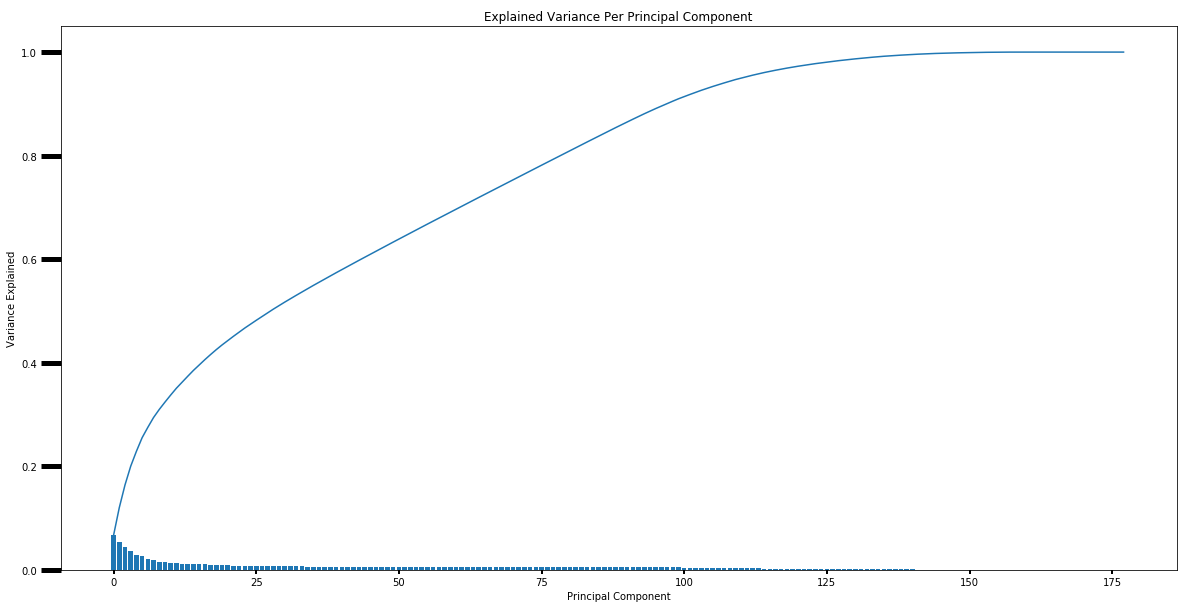

In [190]:
pca_variance_plot(pca.explained_variance_ratio_)

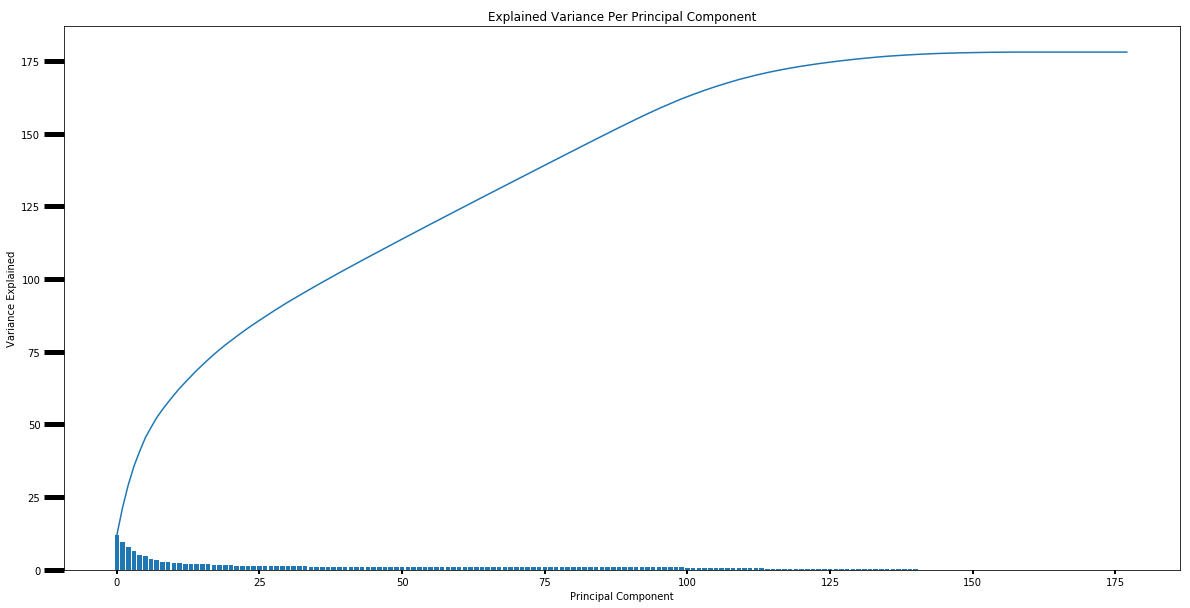

In [191]:
pca_variance_plot(pca.explained_variance_)

In [7]:
# Re-apply PCA to the data while selecting for number of components to retain.
def do_pca(scaled_df):
    pca = PCA(n_components=100)
    ds_reducted = pca.fit_transform(scaled_df)
    return pca, ds_reducted

In [193]:
pca, dataset_reduct = do_pca(dataset_scaled)

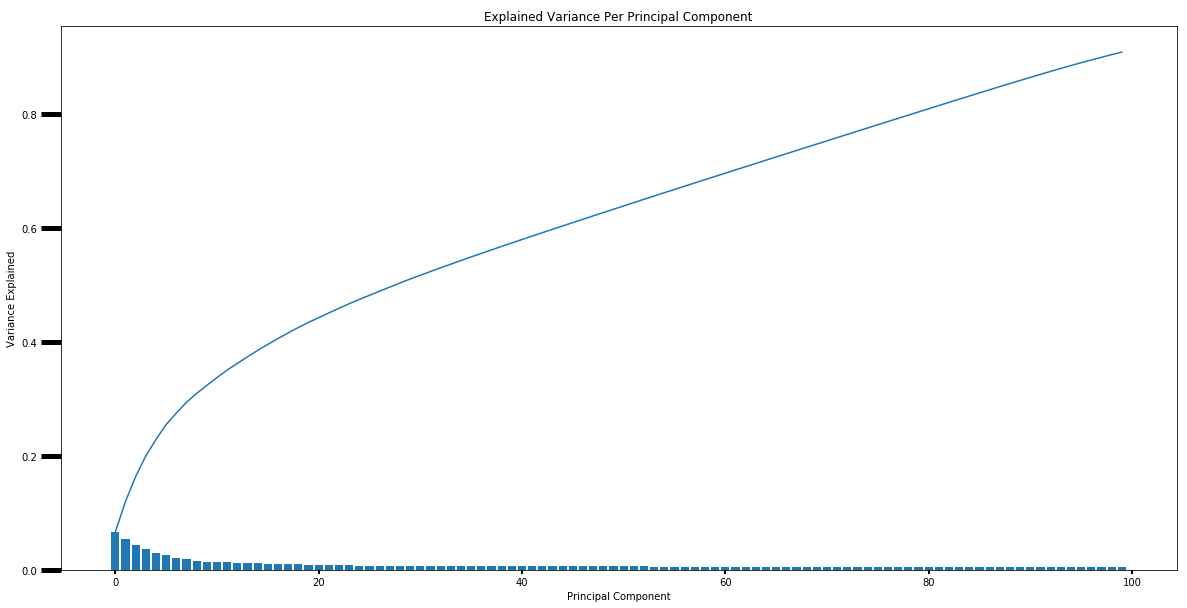

In [194]:
pca_variance_plot(pca.explained_variance_ratio_)

### Discussion 2.2: Perform Dimensionality Reduction
I've executed PCA without any initial parameter and i plotted the variance and the variance ratio. In the first plot, we can see the variance of each feature, scaled between 0 to 1 (percentage). In the second plot we can see variance not scaled. Anyway, It is clear that the most of the variance is given by about 40 features. The curve is increasing a lot between 0 and about 40, then it starts to flect. After 100, the features has a really low impact and after 150 quite nothing. Thus, i decided to use 100 features for the PCA re-application.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [195]:
def pca_results(full_dataset, pca): #This function has taken from an excercise of the PCA lessons (in helper_functions.py)
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['{}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl Var\n          %.4f"%(ev))
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE
1,0.0668,0.0639,-0.0209,0.1992,-0.1123,0.0818,-0.0533,-0.0362,-0.1746,0.0455,...,-0.0251,-0.0346,-0.0576,-0.0591,-0.0556,-0.0159,0.1123,0.1123,0.1123,0.1123
2,0.0532,-0.1770,-0.0384,-0.1267,0.2223,-0.2065,0.1788,0.2167,-0.0476,-0.1234,...,-0.0218,0.0138,0.0128,0.0117,0.0082,-0.0209,0.0457,0.0457,0.0457,0.0457
3,0.0438,0.1043,0.1229,-0.0159,-0.1058,0.0990,-0.0965,-0.0797,0.0692,0.0194,...,0.0245,-0.0039,0.0122,0.0153,0.0220,0.0406,-0.0281,-0.0281,-0.0281,-0.0281


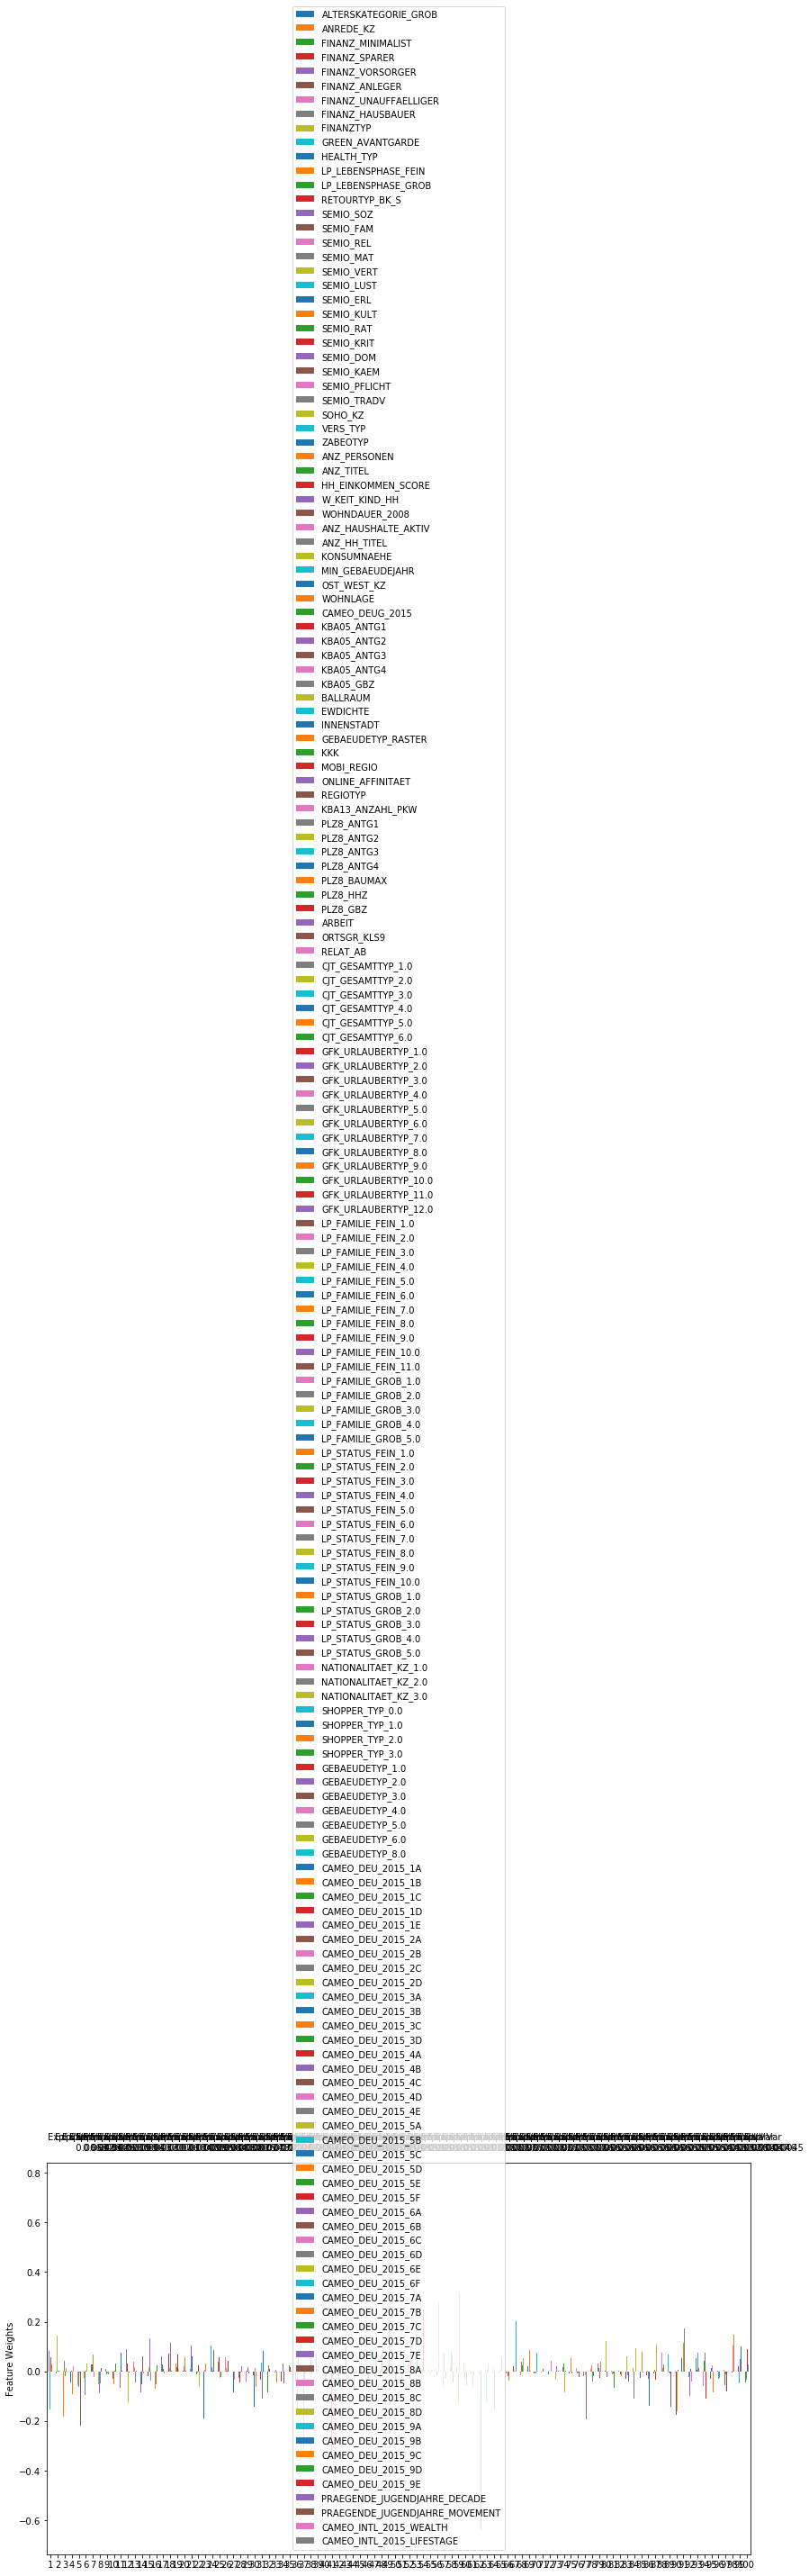

In [196]:
res = pca_results(dataset_scaled, pca)
res = pd.DataFrame(res)
res.head(3)

In [197]:
print(type(pca.components_))
print(pca.components_.shape)
print(pca.components_)

<class 'numpy.ndarray'>
(100, 178)
[[ 0.06389368 -0.02094455  0.19921483 ...,  0.11234298  0.11234298
   0.1123434 ]
 [-0.17699123 -0.03837179 -0.12667362 ...,  0.04567157  0.04567157
   0.04567244]
 [ 0.10425414  0.1228651  -0.01587676 ..., -0.02808155 -0.02808155
  -0.02808211]
 ..., 
 [-0.03379623  0.00103861 -0.00202616 ...,  0.00335181  0.00335181
   0.00335239]
 [-0.00885427 -0.01662821  0.01868194 ..., -0.00675465 -0.00675465
  -0.00675547]
 [ 0.02983201  0.02554372 -0.00401306 ...,  0.0076487   0.0076487
   0.00764515]]


In [198]:
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def print_PCA_components(pca, i_component):
    dimensions = dimensions = [i for i in range(1,len(pca.components_)+1)]
    components = pd.DataFrame(np.round(pca.components_, 4), columns = dataset.keys(), index = dimensions)
    component = components.iloc[i_component,:]
    component.sort_values(inplace=True)
    print(component)

In [199]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print_PCA_components(pca, 1)

FINANZ_VORSORGER        -0.2065
ALTERSKATEGORIE_GROB    -0.1770
SEMIO_ERL               -0.1751
SEMIO_LUST              -0.1692
FINANZ_MINIMALIST       -0.1267
FINANZTYP               -0.1234
CJT_GESAMTTYP_2.0       -0.1106
RETOURTYP_BK_S          -0.0998
WOHNDAUER_2008          -0.0894
NATIONALITAET_KZ_1.0    -0.0834
SHOPPER_TYP_3.0         -0.0651
CJT_GESAMTTYP_1.0       -0.0605
LP_STATUS_GROB_5.0      -0.0562
LP_STATUS_FEIN_10.0     -0.0562
GFK_URLAUBERTYP_4.0     -0.0498
GFK_URLAUBERTYP_7.0     -0.0487
FINANZ_HAUSBAUER        -0.0476
SEMIO_KRIT              -0.0463
SEMIO_KAEM              -0.0446
GREEN_AVANTGARDE        -0.0416
LP_STATUS_FEIN_3.0      -0.0409
LP_FAMILIE_FEIN_2.0     -0.0389
LP_FAMILIE_GROB_2.0     -0.0389
LP_STATUS_FEIN_1.0      -0.0384
ANREDE_KZ               -0.0384
GFK_URLAUBERTYP_3.0     -0.0380
GFK_URLAUBERTYP_5.0     -0.0367
SEMIO_DOM               -0.0344
GFK_URLAUBERTYP_6.0     -0.0297
W_KEIT_KIND_HH          -0.0278
                          ...  
LP_STATU

In [200]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print_PCA_components(pca, 2)

SEMIO_KULT              -0.1831
SEMIO_REL               -0.1651
SEMIO_FAM               -0.1459
ANZ_PERSONEN            -0.1238
LP_LEBENSPHASE_FEIN     -0.1235
SEMIO_SOZ               -0.1216
SEMIO_PFLICHT           -0.1199
SEMIO_TRADV             -0.1163
LP_FAMILIE_GROB_5.0     -0.1156
FINANZ_SPARER           -0.1058
LP_LEBENSPHASE_GROB     -0.1029
SHOPPER_TYP_0.0         -0.1001
ONLINE_AFFINITAET       -0.0991
FINANZ_ANLEGER          -0.0965
SEMIO_VERT              -0.0960
LP_FAMILIE_FEIN_10.0    -0.0818
FINANZ_UNAUFFAELLIGER   -0.0797
SEMIO_MAT               -0.0777
LP_FAMILIE_FEIN_11.0    -0.0699
INNENSTADT              -0.0686
KONSUMNAEHE             -0.0672
WOHNLAGE                -0.0586
LP_STATUS_FEIN_5.0      -0.0552
BALLRAUM                -0.0548
GFK_URLAUBERTYP_9.0     -0.0524
GREEN_AVANTGARDE        -0.0510
SEMIO_RAT               -0.0494
GEBAEUDETYP_RASTER      -0.0463
KBA13_ANZAHL_PKW        -0.0450
LP_STATUS_FEIN_10.0     -0.0424
                          ...  
RETOURTY

In [201]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
print_PCA_components(pca, 3)

ANREDE_KZ                        -0.3352
SEMIO_KAEM                       -0.3008
SEMIO_DOM                        -0.2814
SEMIO_KRIT                       -0.2365
SEMIO_RAT                        -0.1947
FINANZ_ANLEGER                   -0.1840
SEMIO_ERL                        -0.1653
LP_STATUS_FEIN_2.0               -0.0985
FINANZ_SPARER                    -0.0964
KBA13_ANZAHL_PKW                 -0.0919
SHOPPER_TYP_2.0                  -0.0901
FINANZ_UNAUFFAELLIGER            -0.0886
CAMEO_INTL_2015_LIFESTAGE        -0.0882
PRAEGENDE_JUGENDJAHRE_DECADE     -0.0882
PRAEGENDE_JUGENDJAHRE_MOVEMENT   -0.0882
CAMEO_INTL_2015_WEALTH           -0.0882
SEMIO_PFLICHT                    -0.0738
LP_STATUS_FEIN_4.0               -0.0713
SEMIO_TRADV                      -0.0678
LP_FAMILIE_GROB_3.0              -0.0639
INNENSTADT                       -0.0610
HEALTH_TYP                       -0.0601
LP_LEBENSPHASE_GROB              -0.0561
LP_STATUS_FEIN_5.0               -0.0504
FINANZ_HAUSBAUER

### Discussion 2.3: Interpret Principal Components
PCA has reduced dimensionality from more than 190 columns to 120, as decided before. The first components are the one with the higfher variance. Analizing the first three, we can see hoh the feature weights are between -0.3 and 0.3. For each of these components we can see that the lower weights and the highers has a meaningful correlation. These correlated weights are of different sign at the end of the range of values. If we read their descriptions in the dictionary we can understand their meanings. First, we can see how financial features has high weights: financial level or number of properties owned by the person's family. After that, we can note how personality affects weights: near to the edges of these range of values we find features referring to people's agfe and personality.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def k_means_clusters_score(df, number_of_cluster):
    # run k-means clustering on the data and...
    kmeans = KMeans(n_clusters = number_of_cluster)
    model = kmeans.fit(df)
    # compute the average within-cluster distances.
    score = np.abs(model.score(df)) #silhouette_score(df, model.labels_) silhouette rises a memory error... terrible
    return score

In [207]:
scores = []
kvalues = list(range(14,29, 3))

for k in kvalues:
    scores.append(k_means_clusters_score(dataset_reduct, k))

In [208]:
def plot_distances_comparsion(clusters, distances):
    plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)
    ax.plot(clusters, distances)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=5, length=20)
    ax.set_xlabel("Number of Cluster")
    ax.set_ylabel("Mean distance")
    plt.title(f"Mean distance of point from their centroids. {clusters} clusters")

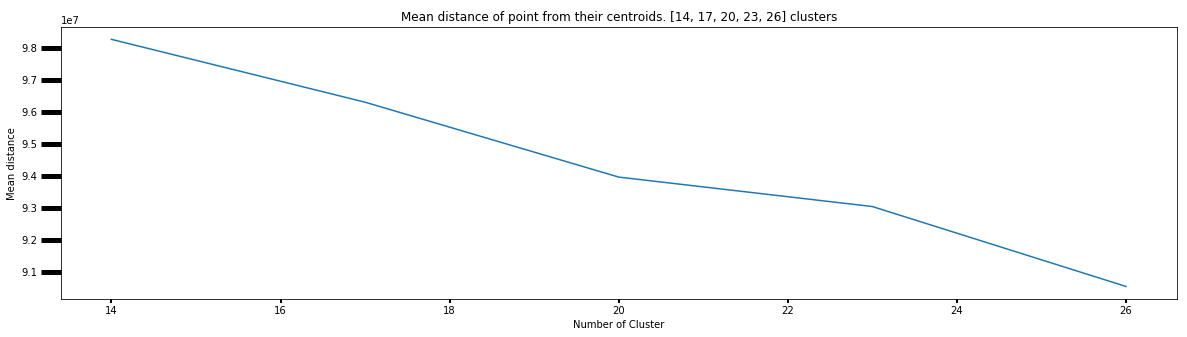

In [209]:
plot_distances_comparsion(kvalues, scores)

In [8]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
def cluster_dataset(data):
    kmeans = KMeans(n_clusters = 22)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

In [211]:
population_labels, kmeans = cluster_dataset(dataset_reduct)

### Discussion 3.1: Apply Clustering to General Population
KMeans is the selected algorithm. The algorithm has been executed for a range of k between 10 and 30. As a result, an elbow curve has been displayed. There is not a clear elbow point but at 22 clusters, the curve decrease is loosing meaning. Thus, 22 is the final selected number of clusters.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [9]:
def adjust_features_for_dimensionality(first_df, second_df):
    '''
    This function filters datasets in order to equilibrate categorical features values.
    These features will be hot-encoded. Fo this reason, we want to be sure of the columns dimensionality.
    The two datasets must have the same number of components for being compared.
    The function assures that every categorical feature has the same number of possible values for each dataset.
    By this way, during the hot-encoding, every categorical feature will be splitted into the same number of columns.
    '''
    #obtaining categorical features
    categorical_features = feat_info[feat_info['type'] == 'categorical']['attribute']
    categorical_features = [x for x in categorical_features if x in first_df.columns]
    to_encode = []
    to_binaries = []
    #selecting features to encode
    for feature in categorical_features:
        values = first_df[feature].unique()
        if not all(str(value).isnumeric() for value in values):
            if len(values) == 2 and not any(pd.isnull(value) for value in values):
                to_binaries.append(feature)
            else:
                to_encode.append(feature)
    #counting how many different values there are for every feature for each dataset
    first_values_counter = {}
    second_values_counter = {}
    for feature in to_encode:
        first_values_counter[feature] = len(first_df[feature].unique())
        second_values_counter[feature] = len(second_df[feature].unique())
    #calculating differences between the two datasets
    different = {key: value for (key, value) in second_values_counter.items() if first_values_counter[key] != second_values_counter[key]}
    print(f"Different Keys: {different.keys()}")
    #for each feature with different number of values, we want to understand how to delete the gap.
    for difference in different:
        print(f"population {difference} values {first_values_counter[difference]}")
        print(first_df[difference].value_counts(sort=True, ascending=True))
        print(f"customers {difference} values {second_values_counter[difference]}")
        print(second_df[difference].value_counts(sort=True, ascending=True))
        #we want to delete rows with the value associated to the lower number of occurences on the dataset with the higher number of values
        #By this way, we can delete the lower number of rows as possible: getting dimensionality with the tiniest information loss.
        gap = np.abs(first_values_counter[difference] - second_values_counter[difference])
        for i in range(0, gap):
            if first_values_counter[difference] > second_values_counter[difference]:
                value_to_filter = first_df[difference].value_counts(sort=True, ascending=True).keys()[0]
                print(f"value to filter:{value_to_filter}")
                first_df[difference] = first_df[first_df[difference] == value_to_filter]
            else:
                value_to_filter = customers[difference].value_counts(sort=True, ascending=True).keys()[0]
                print(f"value to filter:{value_to_filter}")
                second_df[difference] = second_df[second_df[difference] == value_to_filter]
    #returning filtered datasets
    return first_df, second_df

In [10]:
# Load in datasets
people = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=";")
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv",sep=";")
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv",sep=";")

In [11]:
print(people.shape)

(891221, 85)


In [12]:
print(customers.shape)

(191652, 85)


In [13]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
people, customers = adjust_features_for_dimensionality(people, customers)

Different Keys: dict_keys(['TITEL_KZ', 'GEBAEUDETYP'])
population TITEL_KZ values 7
2.0         3
3.0        49
4.0        57
5.0       104
1.0      1947
0.0    815562
Name: TITEL_KZ, dtype: int64
customers TITEL_KZ values 6
5.0        59
3.0       111
4.0       125
1.0      2017
0.0    142744
Name: TITEL_KZ, dtype: int64
value to filter:2.0
population GEBAEUDETYP values 8
5.0         1
6.0       628
4.0       900
2.0      4935
8.0    152476
3.0    178668
1.0    460465
Name: GEBAEUDETYP, dtype: int64
customers GEBAEUDETYP values 7
6.0      142
4.0      251
2.0     2057
8.0    20475
3.0    23655
1.0    95145
Name: GEBAEUDETYP, dtype: int64
value to filter:5.0


In [14]:
people = clean_data(people, outliers=['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBAEUDETYP'])

df shape: (891221, 85)
df filled with NaNs
outliers dropped: ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBAEUDETYP']
df no outliers shape: (891221, 78)
df_lowmiss shape: (796716, 78)
dummy shape: (796716, 172)
encoded: : ['CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'SHOPPER_TYP', 'VERS_TYP', 'CAMEO_DEU_2015']
binaries: ['SOHO_KZ', 'OST_WEST_KZ']
re-engineered dummy shape: (796716, 174)
PRAEGENDE_JUGENDJAHRE re-engineered
CAMEO_INTL_2015 re-engineered


In [15]:
#cleaning customer data, dropping the same outliers as the people dataset (Processing datasets in the same way)
customers = clean_data(customers,  outliers=['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBAEUDETYP'])

df shape: (191652, 85)
df filled with NaNs
outliers dropped: ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBAEUDETYP']
df no outliers shape: (191652, 78)
df_lowmiss shape: (141516, 78)
dummy shape: (141516, 172)
encoded: : ['CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'SHOPPER_TYP', 'VERS_TYP', 'CAMEO_DEU_2015']
binaries: ['SOHO_KZ', 'OST_WEST_KZ']
re-engineered dummy shape: (141516, 174)
PRAEGENDE_JUGENDJAHRE re-engineered
CAMEO_INTL_2015 re-engineered


In [16]:
#as you can see, the shape[1] dimensionality is the same in the two datasets, thanks to the adjust function.
#Adjustment removed 4 rows only, from the people dataset: dimensionality adjustment with low information loss
#Now, doing operations on people dataset

In [17]:
people = impute_dataset(people)

In [18]:
people, scaler = scale_dataset(people)

In [19]:
pca, people_reduct = do_pca(people)

In [22]:
people_labels, kmeans = cluster_dataset(people_reduct)

In [23]:
#Now, applying previous unsupervised operstions to the customer dataset

In [24]:
customers = impute_dataset(customers)

In [25]:
customers = scaler.transform(customers)

In [26]:
customers_reduct = pca.transform(customers)

In [27]:
customers_labels = kmeans.predict(customers_reduct)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [28]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
def plot_clusters_ownership(labels, n_points):
    clusters = set(labels)
    cluster_ownership_percentage = {x: labels.count(x)/n_points*100 for x in clusters}

    fig_dims = (20, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.axis([-1, 22, 0, 40])
    ax.bar(cluster_ownership_percentage.keys(), cluster_ownership_percentage.values())
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=5, length=20)
    ax.set_xlabel("Clusters")
    ax.set_ylabel("Percentage of ownership")
    plt.title('Points ownership to each cluster')

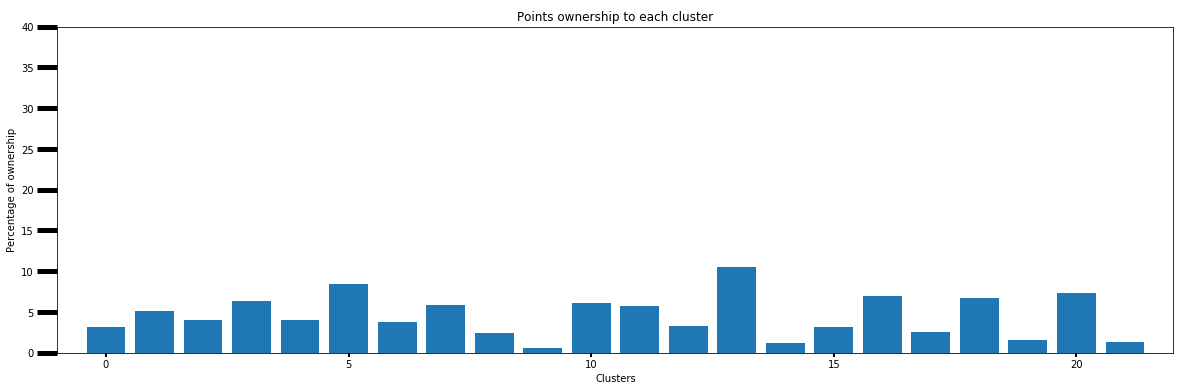

In [29]:
plot_clusters_ownership(people_labels.tolist(), people.shape[0])

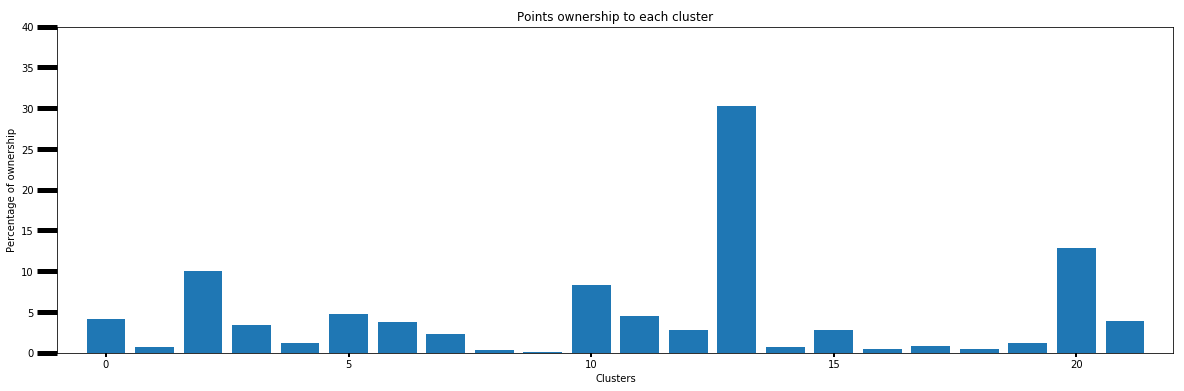

In [30]:
plot_clusters_ownership(customers_labels.tolist(), customers.shape[0])

In [31]:
#getting values with highmiss in order to have an addictuional cluster

In [32]:
#loading data
people = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=";")
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv",sep=";")
#adjusting data
people, customers = adjust_features_for_dimensionality(people, customers)
#cleaning data without splitting dataset by missing threshold
people = clean_data(people, subset_threshold='none', outliers=['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBAEUDETYP']) 
customers = clean_data(customers, subset_threshold='none', outliers=['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBAEUDETYP'])

Different Keys: dict_keys(['TITEL_KZ', 'GEBAEUDETYP'])
population TITEL_KZ values 7
2.0         3
3.0        49
4.0        57
5.0       104
1.0      1947
0.0    815562
Name: TITEL_KZ, dtype: int64
customers TITEL_KZ values 6
5.0        59
3.0       111
4.0       125
1.0      2017
0.0    142744
Name: TITEL_KZ, dtype: int64
value to filter:2.0
population GEBAEUDETYP values 8
5.0         1
6.0       628
4.0       900
2.0      4935
8.0    152476
3.0    178668
1.0    460465
Name: GEBAEUDETYP, dtype: int64
customers GEBAEUDETYP values 7
6.0      142
4.0      251
2.0     2057
8.0    20475
3.0    23655
1.0    95145
Name: GEBAEUDETYP, dtype: int64
value to filter:5.0
df shape: (891221, 85)
df filled with NaNs
outliers dropped: ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBAEUDETYP']
df no outliers shape: (891221, 78)
dummy shape: (891221, 172)
encoded: : ['CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STA

In [33]:
#splitting data into two subsets for each dataset 
people_lowmiss = people[people.isnull().sum(axis=1) <= 18]
people_highmiss = people[people.isnull().sum(axis=1) > 18]
customers_lowmiss = customers[customers.isnull().sum(axis=1) <= 18]
customers_highmiss = customers[customers.isnull().sum(axis=1) > 18]

In [34]:
#imputing and scaling people subsets
people_lowmiss = impute_dataset(people_lowmiss)
people_lowmiss, scaler_lm = scale_dataset(people_lowmiss)
people_highmiss = impute_dataset(people_highmiss)
people_highmiss, scaler_hm = scale_dataset(people_highmiss)
#imputing and scaling customers subsets
customers_lowmiss = impute_dataset(customers_lowmiss)
customers_lowmiss = scaler_lm.transform(customers_lowmiss)
customers_highmiss = impute_dataset(customers_highmiss)
customers_highmiss = scaler_hm.transform(customers_highmiss)

In [35]:
#applying pca to subsets
pca, people_lowmiss_reduct = do_pca(people_lowmiss)
people_highmiss_reduct = pca.transform(people_highmiss)
customers_lowmiss_reduct = pca.transform(customers_lowmiss)
customers_highmiss_reduct = pca.transform(customers_highmiss)

In [36]:
#doing clustering on the lowmiss subsets (adding highmiss as a new label in the next cell)
people_labels, kmeans = cluster_dataset(people_lowmiss_reduct)
customers_labels = kmeans.predict(customers_lowmiss_reduct)

In [37]:
#adding highmiss points as a cluster with label '-1'.
people_lables_extended = people_labels.tolist()
people_lables_extended.extend([-1 for x in range(0, people_highmiss.shape[0])])
customers_labels_extended = customers_labels.tolist()
customers_labels_extended.extend([-1 for x in range(0, customers_highmiss.shape[0])])

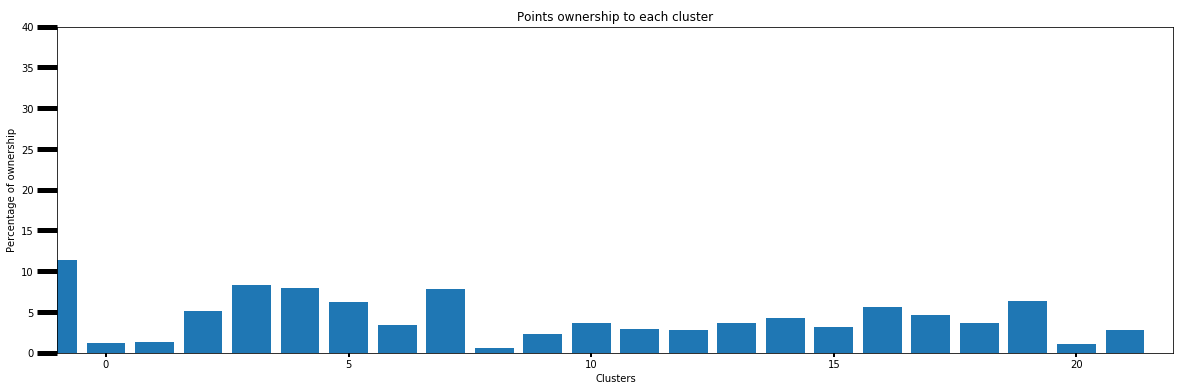

In [38]:
plot_clusters_ownership(people_lables_extended, people_lowmiss.shape[0] + people_highmiss.shape[0])

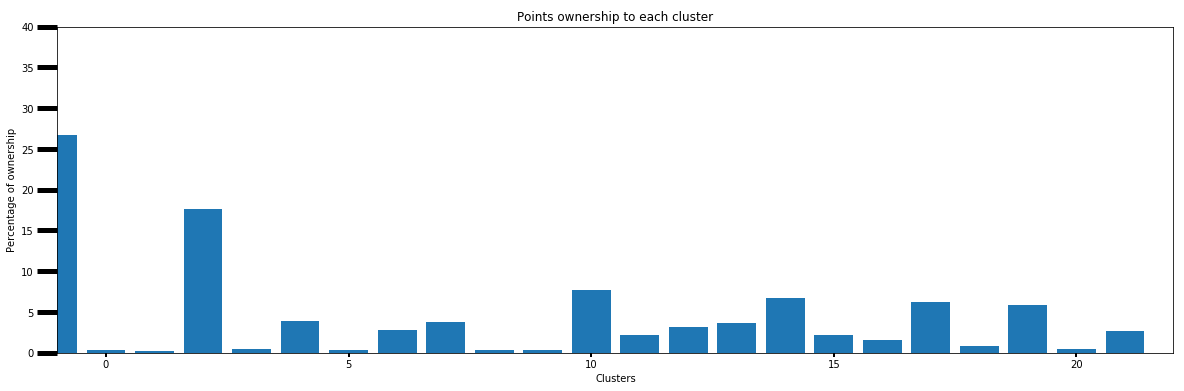

In [39]:
plot_clusters_ownership(customers_labels_extended, customers_lowmiss.shape[0] + customers_highmiss.shape[0])

In [40]:
import seaborn as sns

def plot_count_clusters(labels):
    fig_dims = (20, 6)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.set(style="darkgrid")
    sns.countplot(labels, ax=ax)

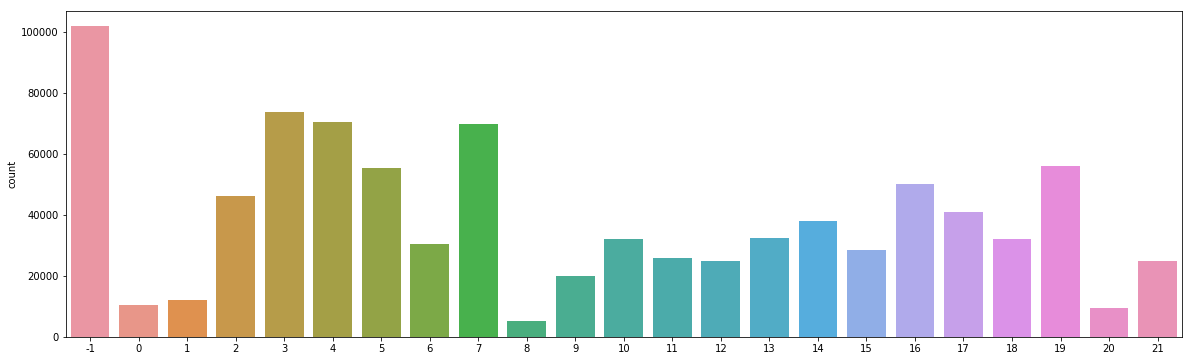

In [41]:
plot_count_clusters(people_lables_extended)

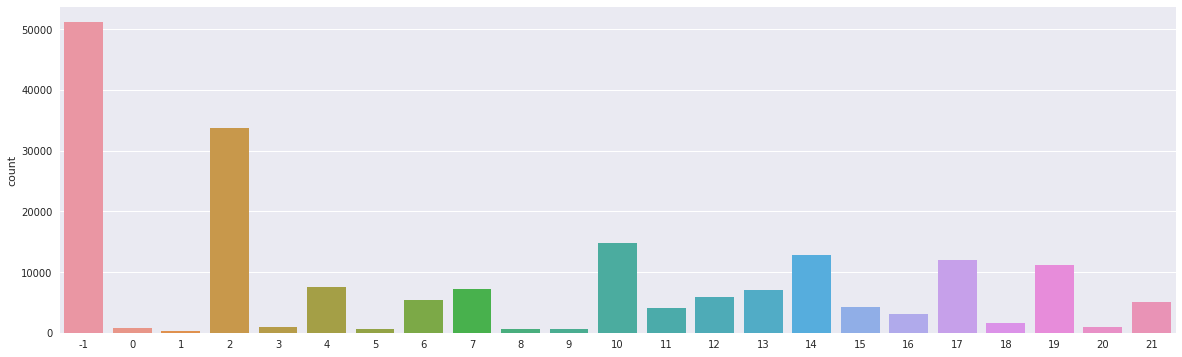

In [42]:
plot_count_clusters(customers_labels_extended)

In [43]:
# Where clusters are more represented in?
n_people = people_lowmiss.shape[0] + people_highmiss.shape[0]
clusters = set(people_lables_extended)
people_ownership_percentage = {x: people_lables_extended.count(x)/n_people*100 for x in clusters}

n_customers = customers_lowmiss.shape[0] + customers_highmiss.shape[0]
customers_ownership_percentage = {x: customers_labels_extended.count(x)/n_customers*100 for x in clusters}

overrepresented_clusters = []
underrepresented_clusters = []

for cluster in clusters:
    if customers_ownership_percentage[cluster] > people_ownership_percentage[cluster]:
        overrepresented_clusters.append(cluster)
    else:
        underrepresented_clusters.append(cluster)
        
print(f"Overrepresented clusters: {overrepresented_clusters}")
print(f"Underrepresented clusters: {underrepresented_clusters}")

Overrepresented clusters: [2, 10, 12, 13, 14, 17, -1]
Underrepresented clusters: [0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 18, 19, 20, 21]


In [44]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

overrepresented_centroids = [] #-1 label excluded
for i in range(0, len(kmeans.cluster_centers_)):
    if i in overrepresented_clusters:
        overrepresented_centroids.append(kmeans.cluster_centers_[i])

overrepresented_transformed_back = scaler_lm.inverse_transform(pca.inverse_transform(overrepresented_centroids))
print(overrepresented_transformed_back.shape)
print(overrepresented_transformed_back)

(6, 174)
[[  3.13378424   1.04595013   4.80551615 ...,  16.96825277  16.96821719
   16.96825085]
 [  3.03180532   1.41292901   3.84968465 ...,  16.75188995  16.75186793
   16.75188876]
 [  2.94880326   1.50942561   3.06131692 ...,  16.65978848  16.65980066
   16.65978913]
 [  3.03663239   1.00522618   3.46339077 ...,  16.3302453   16.33022449
   16.33024418]
 [  3.07785795   1.45600454   4.45544598 ...,  16.65944589  16.65945071
   16.65944615]
 [  3.31236605   1.94862862   4.27934556 ...,  16.97693557  16.97694027
   16.97693583]]


In [45]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

underrepresented_centroids = [] 
for i in range(0, len(kmeans.cluster_centers_)):
    if i in underrepresented_clusters:
        underrepresented_centroids.append(kmeans.cluster_centers_[i])

underrepresented_transformed_back = scaler_lm.inverse_transform(pca.inverse_transform(underrepresented_centroids))
print(underrepresented_transformed_back.shape)
print(underrepresented_transformed_back)

(16, 174)
[[  2.32247772   1.68069036   2.54342813 ...,  16.91774388  16.91941808
   16.9178341 ]
 [  2.64196381   1.41096444   3.857595   ...,  16.78360768  16.78360645
   16.78360761]
 [  1.50441382   2.02496798   1.15714111 ...,  16.24378641  16.24388343
   16.24379164]
 ..., 
 [  3.29566329   1.43625985   4.59534211 ...,  16.33637448  16.33637268
   16.33637438]
 [  2.81305649   1.52119091   3.0449827  ...,  15.18526815  15.18535276
   15.18527271]
 [  3.4157178    1.94449752   3.02560331 ...,  16.44142718  16.44144135
   16.44142795]]


In [46]:
#inference of one overrepresented cluster
def do_inference(cluster):
    cluster_points = [people_lowmiss_reduct[i] for i in range(0, len(people_labels)) if people_labels[i] == cluster]
    return scaler_lm.inverse_transform(pca.inverse_transform(cluster_points))

points_of_cluster_three = do_inference(3)
print(points_of_cluster_three)

[[  1.76680748   2.01737704   1.32504106 ...,  18.31000838  18.30998118
   18.31000692]
 [  1.52282759   2.05528658   1.0864544  ...,  15.06361361  15.06349482
   15.06360721]
 [  1.81542982   2.06555299   2.3853603  ...,  15.85152771  15.85143005
   15.85152245]
 ..., 
 [  1.29418216   2.00626186   1.17639175 ...,  15.79854844  15.7990303
   15.79857441]
 [  1.97035405   2.13425172   0.73965342 ...,  18.74103966  18.74095089
   18.74103488]
 [  2.70277677   2.10626993   1.37279863 ...,  14.8131423   14.81330819
   14.81315124]]


### Discussion 3.3: Compare Customer Data to Demographics Data

Clustering data has shown as the customer data and the population data has some difference of distribution. As we can see, there are 6 clusters of people represented in customer over people. clusters (2, 10, 12, 13, 14, 17). Cluster -1, the cluster of rows with few values is also in overrepresented. (7nt cluster of the group). This means that people of points associated to these clusters are a good target for the company. Thus, we can take people of those clusters and to ecexute the inverse transformation in order to get their original features and values. The most of the clusters are underrepresented. clusters (0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 15, 16, 18, 19, 20, 21). This means that these clusters are a representation of people not so handy for the company targets.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.